# **DSA210 TERM PROJECT**

# Import necessary libraries and pull the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


Changing the number 1s and 2s into No's and Yes's, M to Male and F to Female for better visualization.

In [3]:
binary_columns = [
    "SMOKING", "YELLOW_FINGERS", "PEER_PRESSURE", "CHRONIC_DISEASE",
    "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "ANXIETY",
    "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"
]

# Map 1 -> 'No', 2 -> 'Yes'
df[binary_columns] = df[binary_columns].replace({1: "No", 2: "Yes"})
df["GENDER"] = df["GENDER"].replace({"M": "Male", "F": "Female"})

Total distribution of cancer patients and healthy patients.

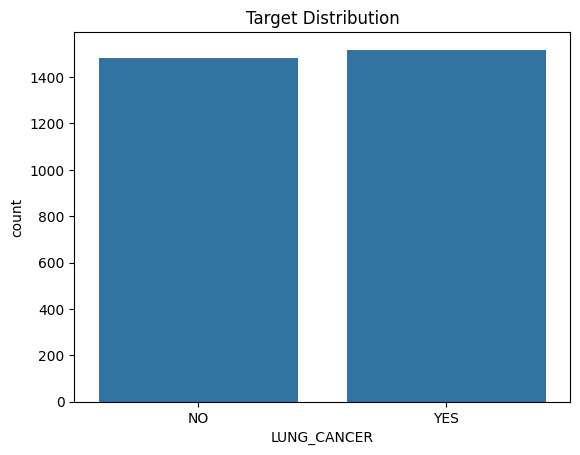

In [4]:
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

Plotting the most common assumptions for cause of Lung Cancers.

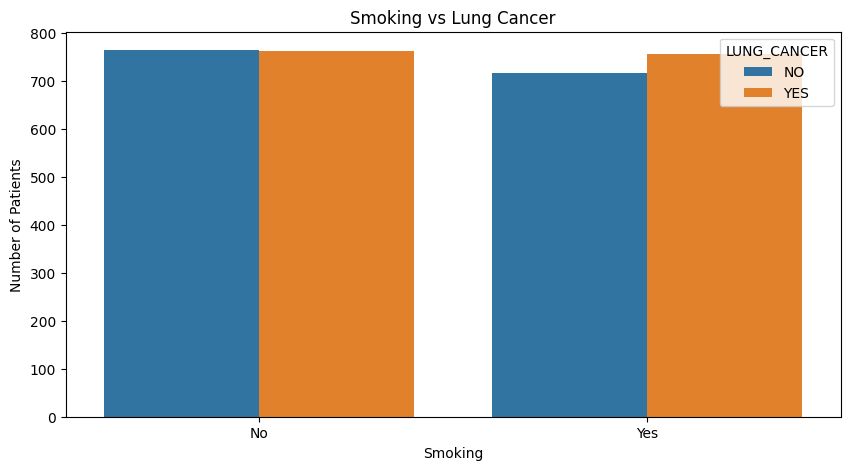

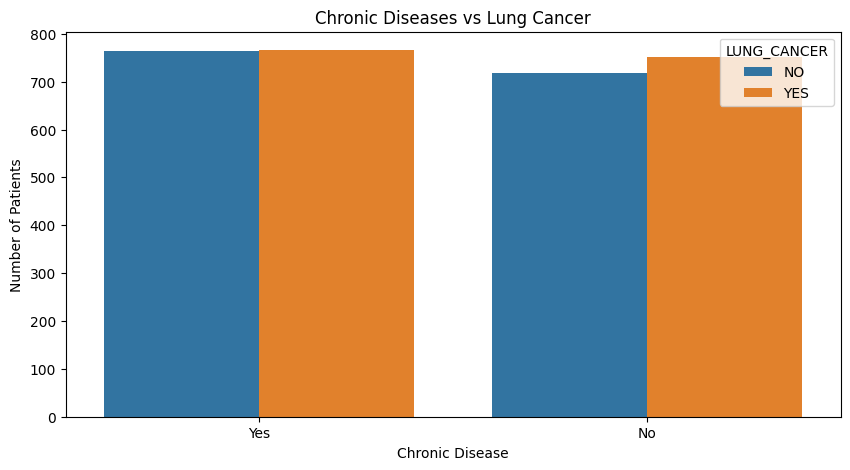

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x="SMOKING", hue="LUNG_CANCER", data=df)
plt.title("Smoking vs Lung Cancer")
plt.xlabel("Smoking")
plt.ylabel("Number of Patients")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x="CHRONIC_DISEASE", hue="LUNG_CANCER", data=df)
plt.title("Chronic Diseases vs Lung Cancer")
plt.xlabel("Chronic Disease")
plt.ylabel("Number of Patients")
plt.show()


Age distributions of patients for Lung Cancer and Smoking

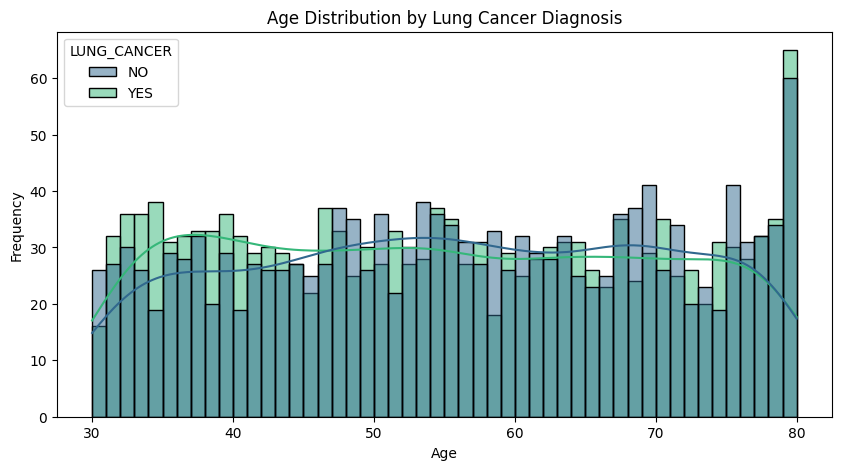

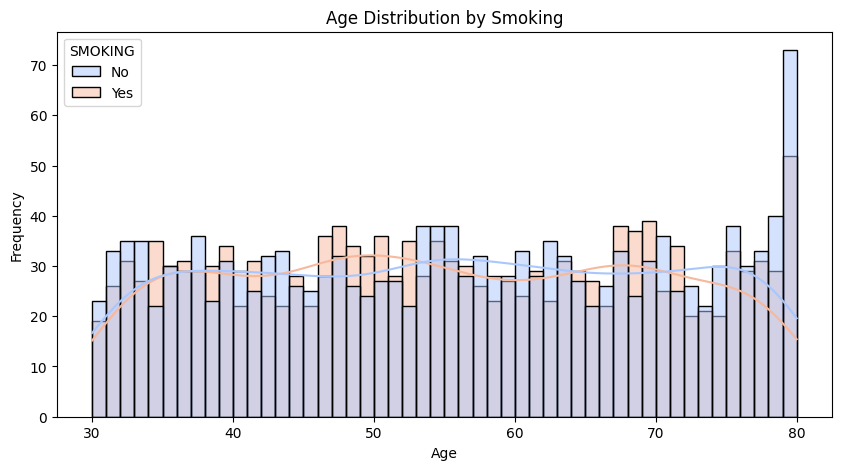

Mean Age: 55.169
Median Age: 55.0
Mode Age: 54


In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="AGE", hue="LUNG_CANCER", kde=True, bins=50, palette="viridis")
plt.title("Age Distribution by Lung Cancer Diagnosis")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="AGE", hue="SMOKING", kde=True, bins=50, palette="coolwarm")
plt.title("Age Distribution by Smoking")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Male/Female Ratio

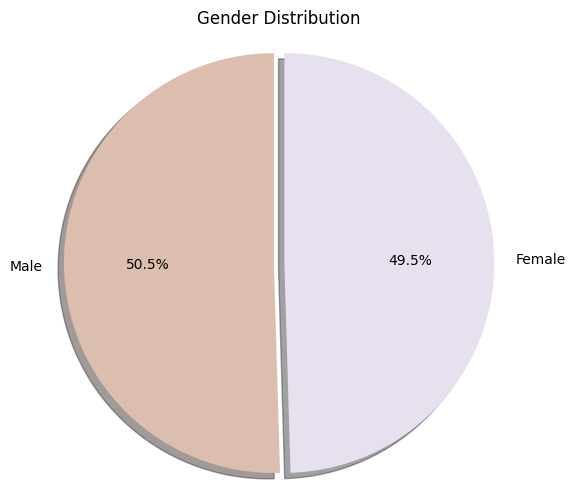

In [7]:
df["GENDER"] = df["GENDER"].replace({"M": "Male", "F": "Female"})

gender_counts = df["GENDER"].value_counts()

colors = ["#dcbeaf", "#e7e0ee"]
explode = (0.05, 0)

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

Some Columns of Possible Causes vs Age Using Violin Graphs

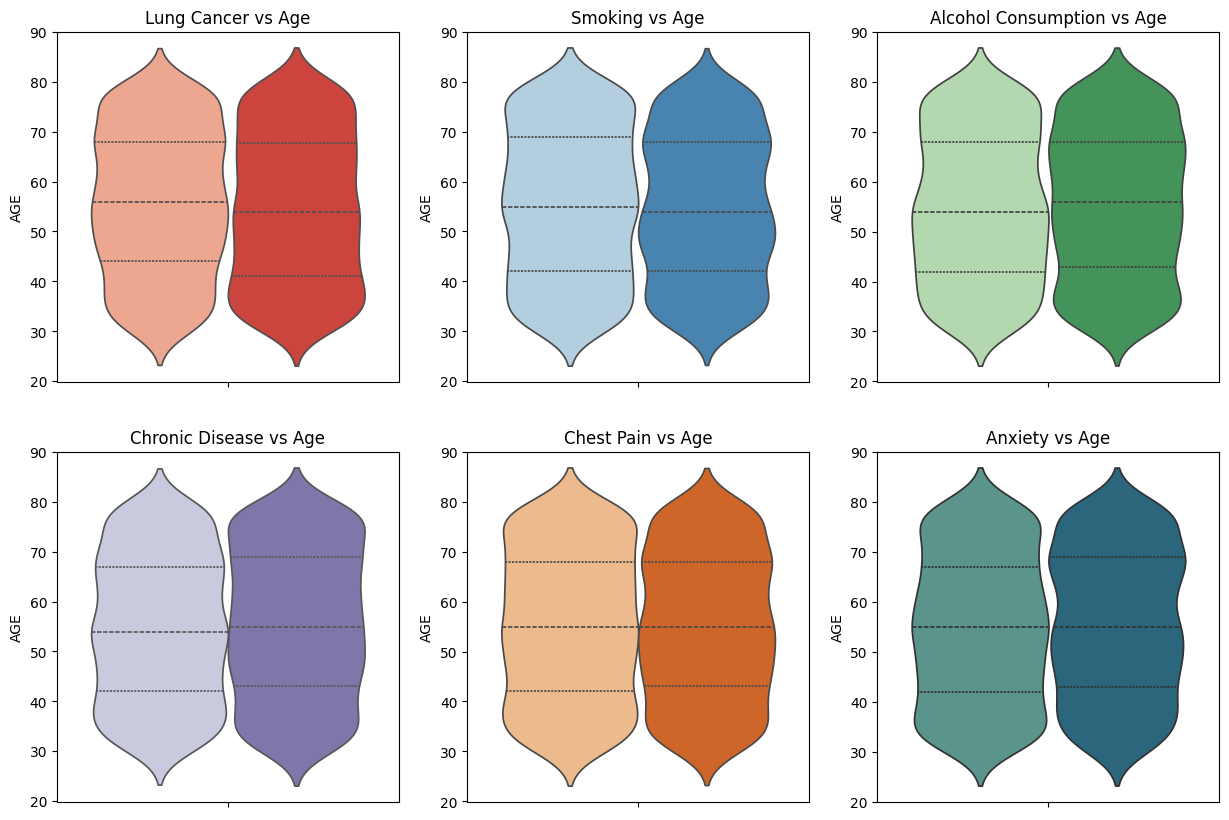

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.violinplot(hue="LUNG_CANCER", y="AGE", data=df, inner="quartile", ax=axes[0][0], palette="Reds", legend=False)
axes[0][0].set_title("Lung Cancer vs Age")

sns.violinplot(hue="SMOKING", y="AGE", data=df, inner="quartile", ax=axes[0][1], palette="Blues", legend=False)
axes[0][1].set_title("Smoking vs Age")

sns.violinplot(hue="ALCOHOL_CONSUMING", y="AGE", data=df, inner="quartile", ax=axes[0][2], palette="Greens", legend=False)
axes[0][2].set_title("Alcohol Consumption vs Age")

sns.violinplot(hue="CHRONIC_DISEASE", y="AGE", data=df, inner="quartile", ax=axes[1][0], palette="Purples", legend=False)
axes[1][0].set_title("Chronic Disease vs Age")

sns.violinplot(hue="CHEST_PAIN", y="AGE", data=df, inner="quartile", ax=axes[1][1], palette="Oranges", legend=False)
axes[1][1].set_title("Chest Pain vs Age")

sns.violinplot(hue="ANXIETY", y="AGE", data=df, inner="quartile", ax=axes[1][2], palette="crest", legend=False)
axes[1][2].set_title("Anxiety vs Age")

plt.show()

All Columns vs Lung Cancer

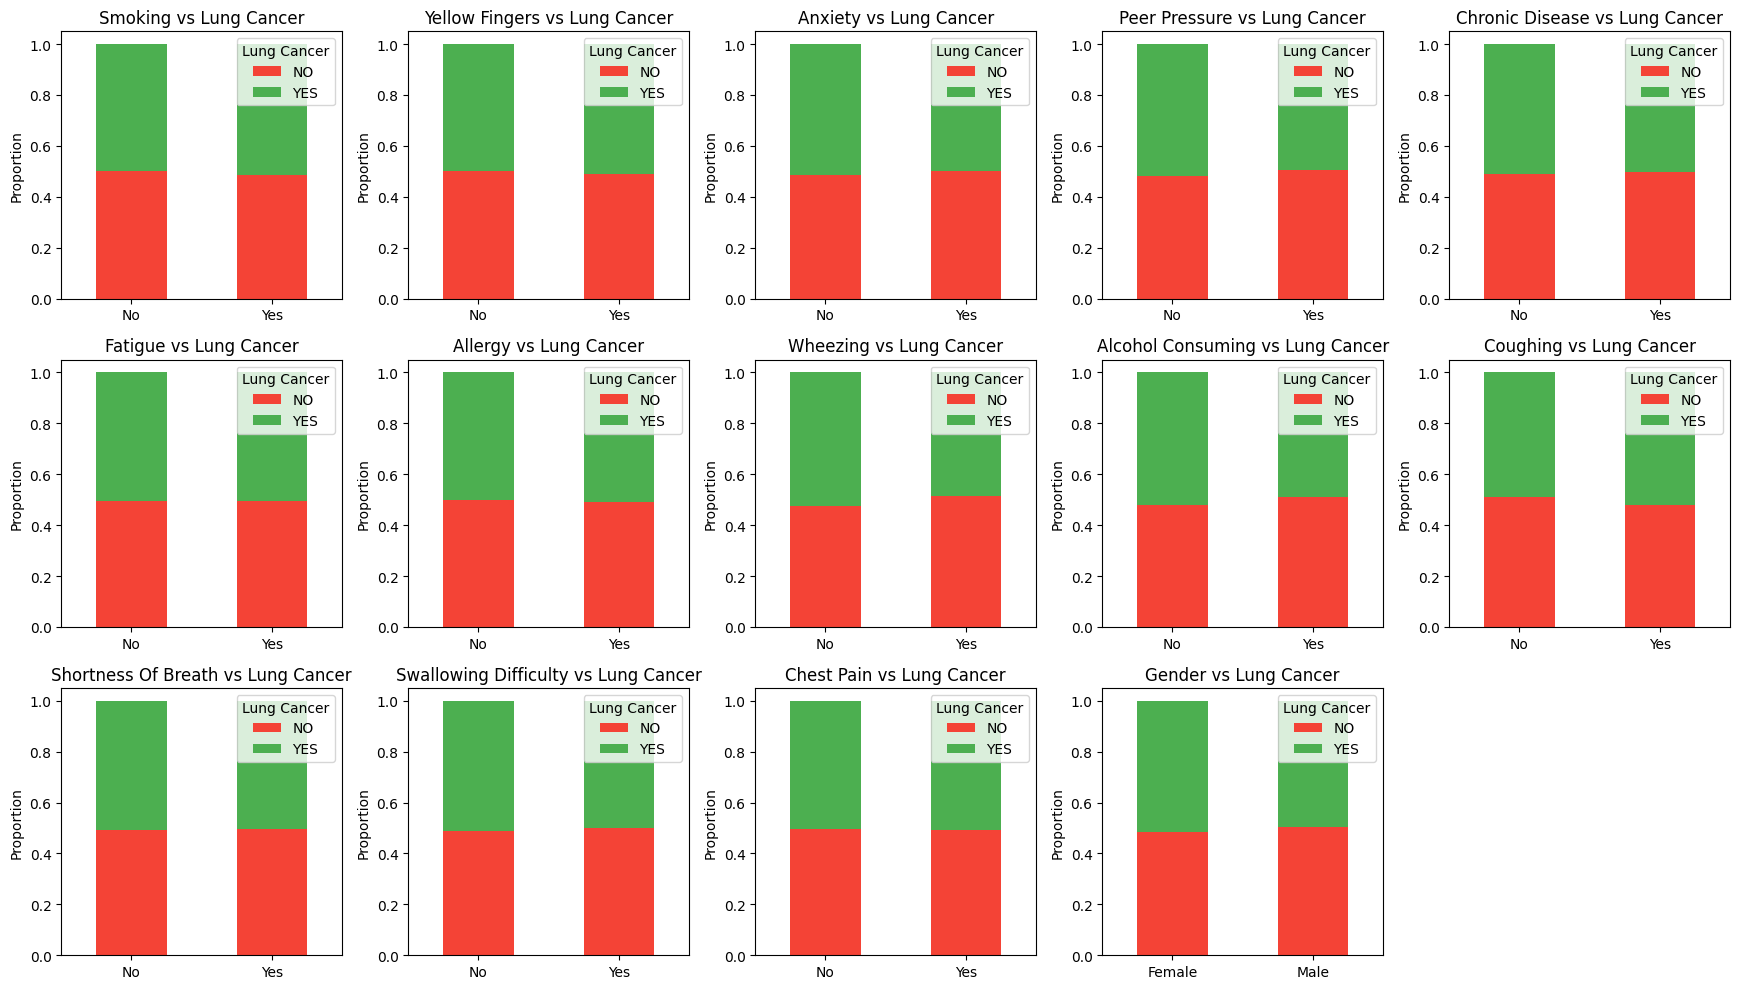

In [9]:
features = [
    "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC_DISEASE",
    "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING",
    "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN", "GENDER", "AGE"
]

fig, axes = plt.subplots(3, 5, figsize=(17.5, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    if feature == "AGE":
        axes[i].axis('off')
        continue
    crosstab = pd.crosstab(df[feature], df["LUNG_CANCER"], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=["#F44336", "#4CAF50"])

    axes[i].set_title(f"{feature.replace('_', ' ').title()} vs Lung Cancer")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel("")
    axes[i].legend(title="Lung Cancer", loc='upper right')

    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Correlation Matrix of Lung Cancer Dataset

<ipython-input-10-a6375cd0884b>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded[yes_no_columns] = df_encoded[yes_no_columns].applymap(yes_no_map.get)


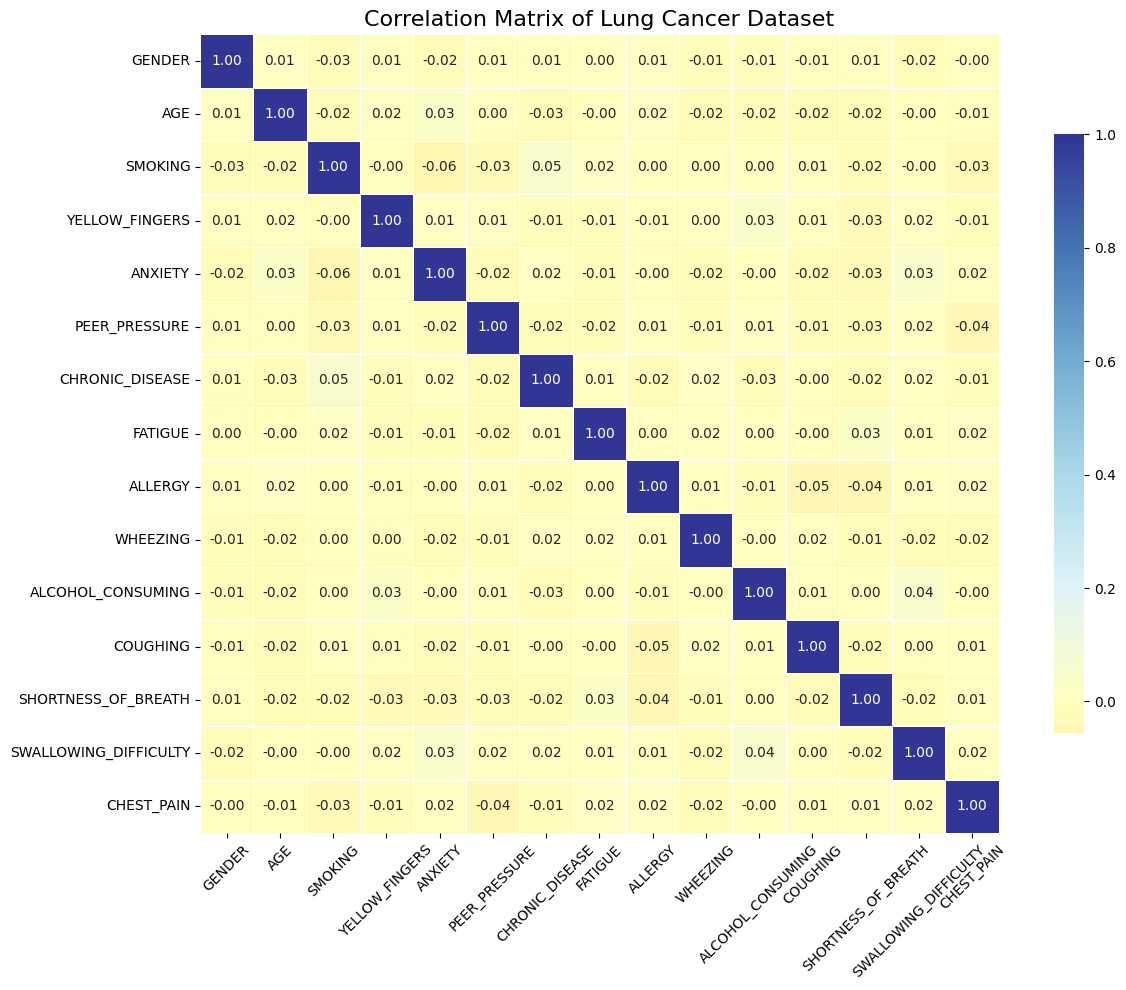

In [10]:
df_encoded = df.copy()
yes_no_map = {"Yes": 1, "No": 0}
gender_map = {"Male": 1, "Female": 0}

yes_no_columns = [
    "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
    "CHRONIC_DISEASE", "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING",
    "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN", "LUNG_CANCER"
]

df_encoded[yes_no_columns] = df_encoded[yes_no_columns].applymap(yes_no_map.get)
df_encoded["GENDER"] = df_encoded["GENDER"].map(gender_map)

df_numeric = df_encoded.select_dtypes(include=["number"])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix of Lung Cancer Dataset", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()